In [521]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
%matplotlib inline

In [479]:
#imports the csv file
csv_file = "women-stem.csv"

#reads the csv file into the dataframe
df = pd.read_csv(csv_file)
#print(df)

#shows the first five lines
df.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [482]:
#groups the dataset into categories by majors, and takes the average of each category
dfMeans = df.groupby("Major_category").mean()

#prints the first five lines of the categorized/averaged dataset
dfMeans.head()

,Rank,Major_code,Total,Men,Women,ShareWomen,Median
Major_category,,,,,,,
Biology & Life Science,58.142857,3475.857143,32418.714286,13208.500000,19210.214286,0.587193,36421.428571
Computers & Mathematics,39.545455,2702.727273,27182.545455,18975.000000,8207.545455,0.311772,42745.454545
Engineering,18.206897,2489.896552,18537.344828,14079.551724,4457.793103,0.238889,57382.758621
Health,58.916667,5937.916667,38602.500000,6293.083333,32309.416667,0.795152,36825.000000
Physical Sciences,44.200000,5022.800000,18547.900000,9539.000000,9008.900000,0.508683,41890.000000


In [483]:
#returns the average number of women in each major category
meanWomen = dfMeans["Women"]
print(meanWomen)

#returns the average number of men in each major category
meanMen = dfMeans["Men"]
print(meanMen)

Major_category
Biology & Life Science     19210.214286
Computers & Mathematics     8207.545455
Engineering                 4457.793103
Health                     32309.416667
Physical Sciences           9008.900000
Name: Women, dtype: float64
Major_category
Biology & Life Science     13208.500000
Computers & Mathematics    18975.000000
Engineering                14079.551724
Health                      6293.083333
Physical Sciences           9539.000000
Name: Men, dtype: float64


(0, 40000)

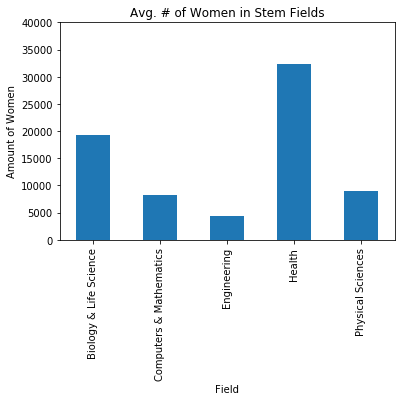

In [485]:
#creates a graph for the average number of women in each major category
mean_women_cat = dfMeans["Women"]
mean_women_cat.plot(kind="bar")

#labelling the title and x/y axes
plt.title('Avg. # of Women in Stem Fields')
plt.ylabel('Amount of Women')
plt.xlabel('Field')

#creating a limit of 40,000 is necessary to give both graphs the same scale
plt.ylim(0,40000)

(0, 40000)

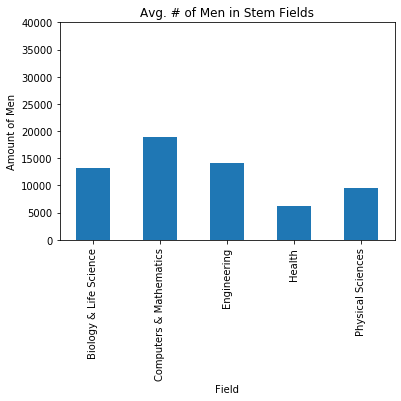

In [486]:
#creates a graph for the average number of women in each major category
mean_men_cat = dfMeans["Men"]
mean_men_cat.plot(kind="bar")

#labelling the title and x/y axes
plt.title('Avg. # of Men in Stem Fields')
plt.ylabel('Amount of Men')
plt.xlabel('Field')

#creating a limit of 40,000 is necessary to give both graphs the same scale
plt.ylim(0,40000)

Text(0.5, 0, 'Salaries')

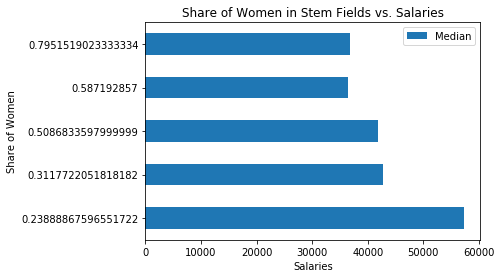

In [492]:
#preliminary analysis: comparing the share of women in each major category vs that field's median salary
dfShare = (dfMeans.sort_values(by='ShareWomen', ascending = True))
dfShare.plot(kind = "barh",x='ShareWomen',y='Median')

#labelling the title and x/y axes
plt.title('Share of Women in Stem Fields vs. Salaries')
plt.ylabel('Share of Women')
plt.xlabel('Salaries')

#Note: If I was able to/ with a better understanding of matplotlib and pandas, 
#I would have changed the bar labels on the y axis to reflect 
#the different major categories they each represent, and as to remove the confusing string of numbers.

In [503]:
#imports the csv file of the second dataset
csv_file2 = "recent-grads.csv"

#reads the csv file into the dataframe
df2temp = pd.read_csv(csv_file2)

df2temp.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [522]:
#this imported data set had hundreds of majors that didn't fit the criteria for this data story.
#so, the following code filters the data table for only important, usable data

#filters out all unrelated columns
df2temp2 = df2temp.filter(items=['Major_category', 'Men', 'Women', 'ShareWomen', 'Unemployment_rate', 
                                'P25th', 'P75th', 'Low_wage_jobs', 'Part_time'])

#filters out all unrelated majors (arts, humanities) so the dataset contains only STEM statistics
df2_filtered = df2temp2[(df2temp.Major_category == "Engineering") | 
                       (df2temp.Major_category == "Biology & Life Science") | 
                       (df2temp.Major_category == "Physical Sciences") | 
                       (df2temp.Major_category == "Health") | 
                       (df2temp.Major_category == "Computers & Mathematics")]

#stores the new dataset into a finished data frame
df2 = df2_filtered

#prints the last five data rows in the frame
df2.tail()

,Major_category,Men,Women,ShareWomen,Unemployment_rate,P25th,P75th,Low_wage_jobs,Part_time
126,Health,13487.0,35004.0,0.721866,0.059821,24000,41000,4468,12346
132,Biology & Life Science,3878.0,5276.0,0.576360,0.054475,23000,42000,976,2741
134,Health,7574.0,26025.0,0.774577,0.082102,25000,45000,3816,11088
163,Health,1225.0,37054.0,0.967998,0.047584,20000,40000,5125,13862
168,Biology & Life Science,3050.0,5359.0,0.637293,0.046320,20000,39000,743,2190


In [498]:
#groups the dataset into categories by majors, and takes the average of each category
df2Means = df2.groupby("Major_category").mean()

#prints the first five lines of the categorized/averaged dataset
df2Means.head()

,Men,Women,ShareWomen,Unemployment_rate,P25th,P75th,Low_wage_jobs,Part_time
Major_category,,,,,,,,
Biology & Life Science,13208.500000,19210.214286,0.587193,0.060918,26614.285714,46085.714286,3053.000000,8338.285714
Computers & Mathematics,18975.000000,8207.545455,0.311772,0.084256,29290.909091,58090.909091,1466.909091,4842.727273
Engineering,14079.551724,4457.793103,0.238889,0.063334,41555.172414,70448.275862,864.793103,2935.724138
Health,6293.083333,32309.416667,0.795152,0.065920,26166.666667,50250.000000,2605.833333,9549.333333
Physical Sciences,9539.000000,9008.900000,0.508683,0.046511,28350.000000,57290.000000,1407.800000,4344.400000


(0, 10000)

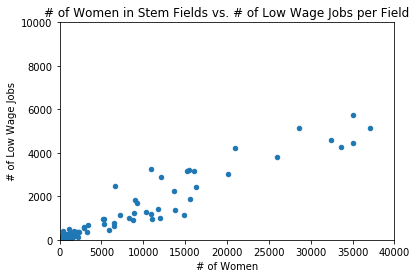

In [493]:
#second analysis: contrasting the share of women in each field vs. the number of low wage jobs

#creates a data frame "share of unemployment(ShUmp)" to sort the values and create a scatter plot
dfShUmp = (df2.sort_values(by='Women', ascending = True))
dfShUmp.plot(kind = "scatter",x='Women',y='Low_wage_jobs')

#labelling the title and x/y axes
plt.title('# of Women in Stem Fields vs. # of Low Wage Jobs per Field')
plt.ylabel('# of Low Wage Jobs')
plt.xlabel('# of Women')
plt.xlim(0, 40000)
plt.ylim(0, 10000)

Major_category
Biology & Life Science     32.688813
Computers & Mathematics    20.424439
Engineering                18.230290
Health                     27.989478
Physical Sciences          27.795977
Name: Part timers, dtype: float64


Text(0.5, 0, 'Percentage of Part Time Jobs')

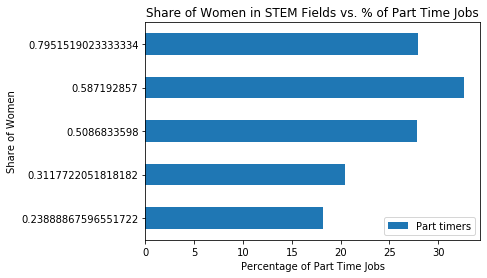

In [520]:
#after finishing the other three graphs, I got the idea to analyze the relationship 
#between the share of part time jobs in a field with the share of women in that field.

#however, I didn't want to disrupt my other data by editing the original data frame directly,
#so I created a new data frame 3 with the statistics I needed here.

#takes all the data from the original, unedited data frame
newdf2 = df2temp

#filters the data frame again to only contain STEM statistics
newdf2_filtered = newdf2[(newdf2.Major_category == "Engineering") | 
                       (newdf2.Major_category == "Biology & Life Science") | 
                       (newdf2.Major_category == "Physical Sciences") | 
                       (newdf2.Major_category == "Health") | 
                       (newdf2.Major_category == "Computers & Mathematics")]

#organizes the data frame to be categorized by Major_category, and present each column's averages
newdf3 = newdf2_filtered.groupby("Major_category").mean()

#calculates the percentage of the # of part time jobs in each field, out of the total # of jobs
b = newdf3['Part_time']/(newdf3['Part_time']+newdf3['Full_time']) * 100

#inserts the new values into the new data frame
newdf3.insert(1, "Part timers", b)

#prints the new, smaller dataset
print(newdf3['Part timers'])

#sorts the data and plots the analysis
sorteddf3 = newdf3.sort_values(by="ShareWomen", ascending=True)
sorteddf3.plot(kind="barh", x="ShareWomen", y="Part timers")

#labelling the title and x/y axes
plt.title('Share of Women in STEM Fields vs. % of Part Time Jobs')
plt.ylabel('Share of Women')
plt.xlabel('Percentage of Part Time Jobs')

In [391]:
#creates a new data frame with all the averaged values of the new dataset
newdf = df2Means

#calculates the ratio of men to women in each of the major categories
x = newdf['Men']/newdf['Women']

#inserts a column into the new data frame storing this ratio data
newdf.insert(1, "Ratios", x)

Text(0.5, 0, '# of Low Wage Jobs')

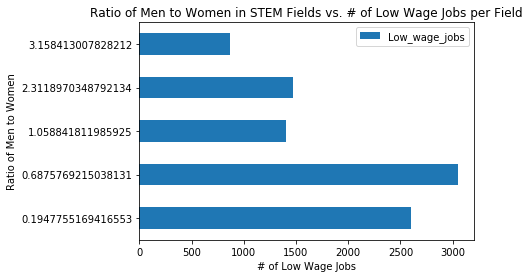

In [495]:
#fourth analysis: comparing the ratio of men to women in each major category vs. that field's low wage jobs
newnewdf = newdf.sort_values(by="Ratios", ascending=True)
newnewdf.plot(kind="barh", x="Ratios", y="Low_wage_jobs")

#labelling the title and x/y axes
plt.title('Ratio of Men to Women in STEM Fields vs. # of Low Wage Jobs per Field')
plt.ylabel('Ratio of Men to Women')
plt.xlabel('# of Low Wage Jobs')

#Note: Again, if I was able to/ with a better understanding of matplotlib and pandas, 
#I would have changed the bar labels on the y axis to reflect 
#the different major categories they each represent, and as to remove the confusing string of numbers.